# **A. Data Inspecting**

# **Loading necessary libraries and datasets**

In [1]:
import os
import pandas as pd # for loading csv file (export from excel) into Python
import numpy as np

import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import seaborn as sns

# from sklearn import preprocessing
# from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
# from sklearn.linear_model import LogisticRegression

import missingno as msno

# **Reading data**
Reading in the dataset hotel_bookings.csv

In [2]:
# Load the dataset
df = pd.read_csv('hotel_bookings.csv')

print('Data shape (#row x #columns): ', df.shape)

# Display the first few rows of the dataset
df.head()

Data shape (#row x #columns):  (119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# **B. Data Cleaning**

# **Detecing Missing Values**

## Detecting missing values numerically

**Step 1: Calculate the total missing values**
>To better identify missing data and choose how to handle it, we effectively calculate the total amount of missing (NaN) values for each column in the DataFrame in this step. The missing values in each column are counted using sum ( ) after the insull ( ) functions identifies the missing data points.

In [3]:
def count_missing_values(df):
    # Check for the total mising values of each column
    return df.isnull().sum()

# Show the result
missing_counts = count_missing_values(df)
print("Missing Values Count:\n", missing_counts)

Missing Values Count:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                             

**Step 2: Calculate the percentage of missing values**
>Here, the function estimates the proportion of these missing values to provide a more meaningful context rather than raw counts by  helping us evaluate the significance and severity of missing values, making it easier to determine how to address the issue in relation to the size of the dataset as a whole.

In [4]:
# Calculate the percentage of missing values
def calculate_missing_percent(df):
    return 100 * df.isnull().sum() / len(df)
# Print the result
missing_percent = calculate_missing_percent(df)
print("Percentage of Missing Values:\n", missing_percent)

Percentage of Missing Values:
 hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
d

**Step 3: Create a table with the results**
>The function concatenates the total missing values and their corresponding percentages into a single table, serving as a succinct summary of the missing data across all columns.

In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 32 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
company,112593,94.3
agent,16340,13.7
country,488,0.4
children,4,0.0


## Detecting missing data visually using Missingno library
> It is crucial to use the Missingno library to visually detect missing data because it is capable of displaying not only the existence of missing values but also their patterns and relationships. This is essential for us to decide later on how to deal with the missing data, including whether to eliminate columns, impute values, or use specific algorithms that can deal with missingness.

<Axes: >

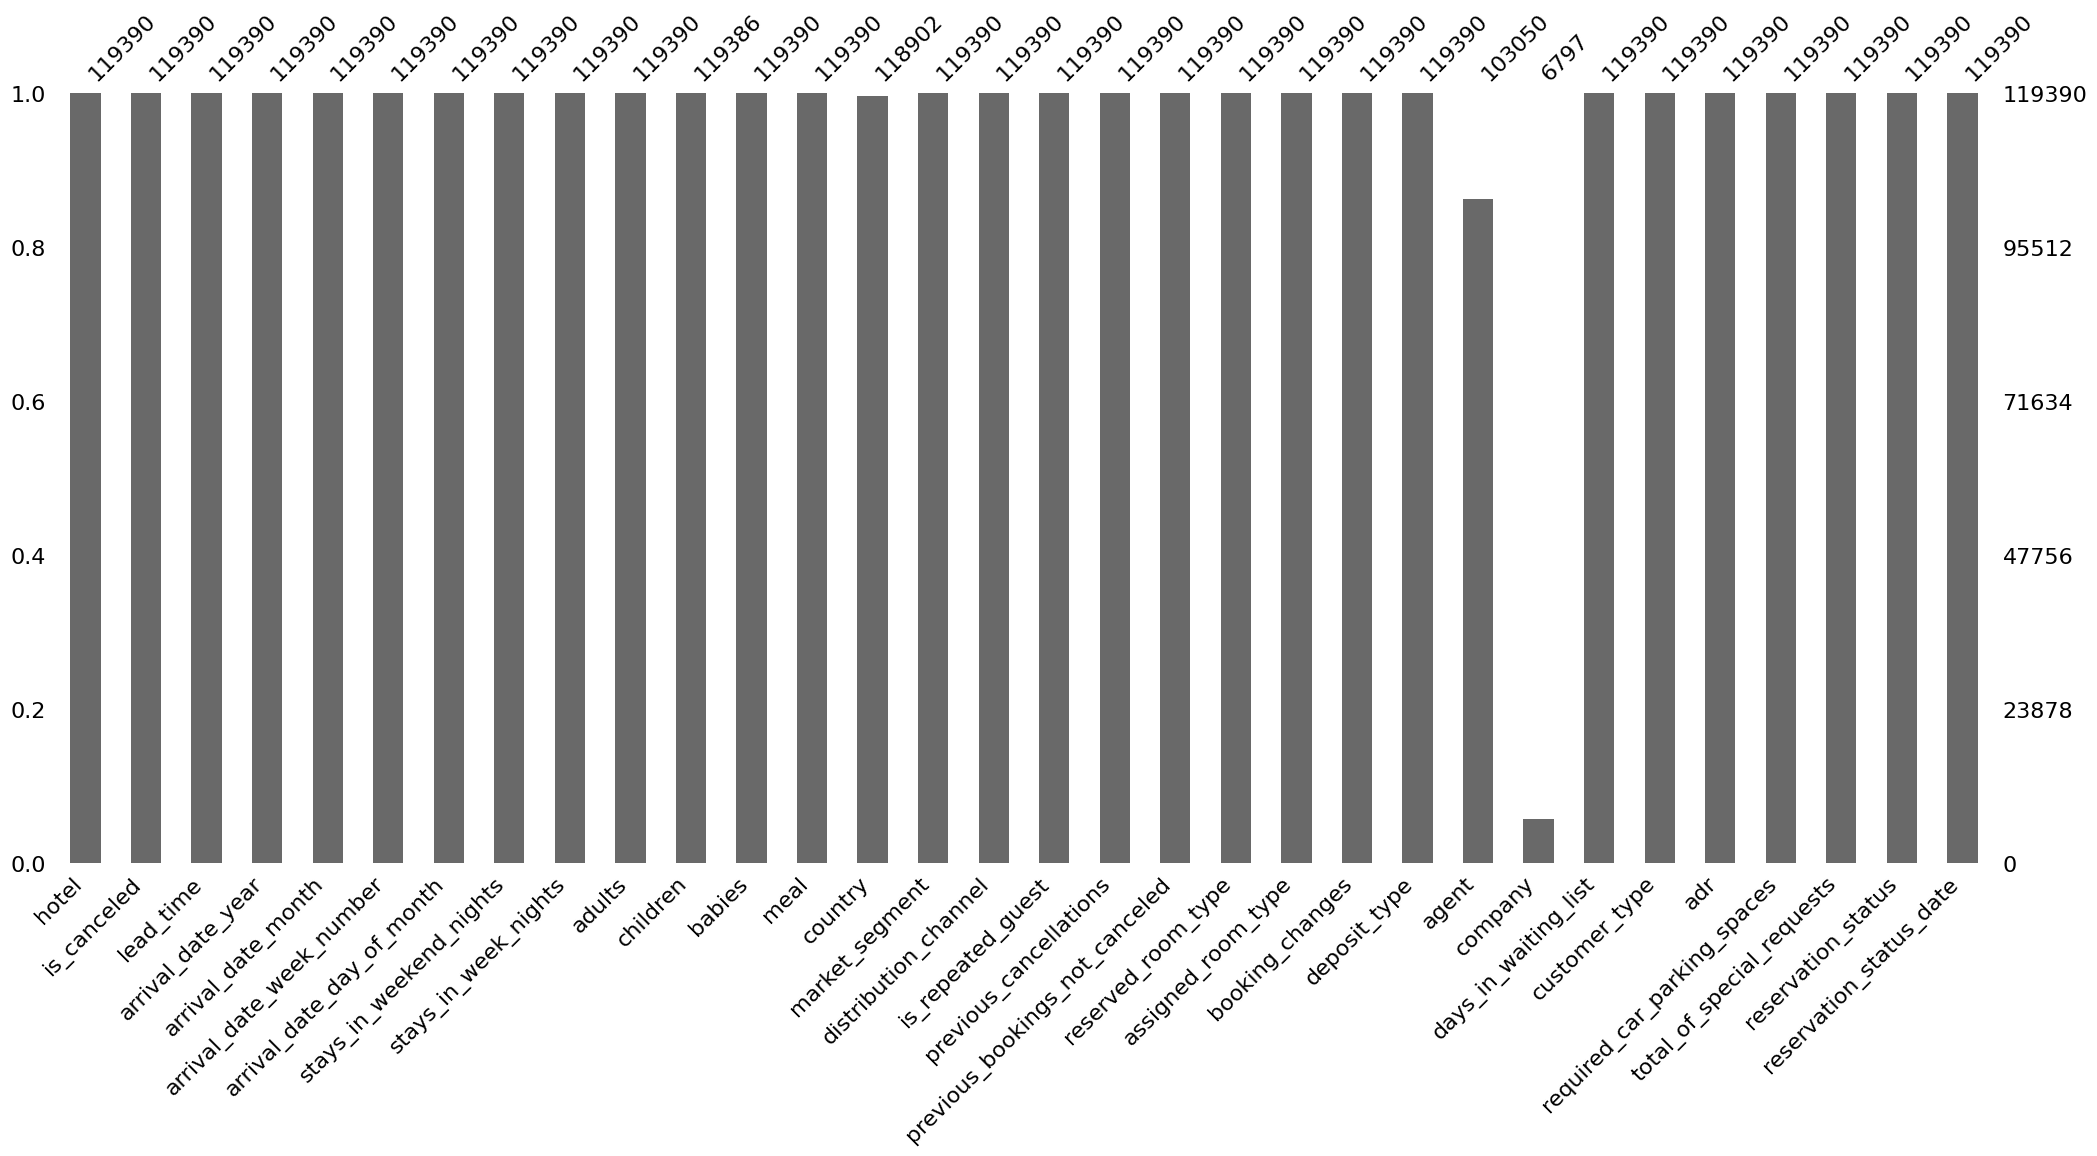

In [7]:
#Visualize missing values
msno.bar(df)

# **Visualizing the locations of the missing data**
>This visualization allows for quick identification of where missing values are located, making it easier to spot patterns in the data.

<Axes: >

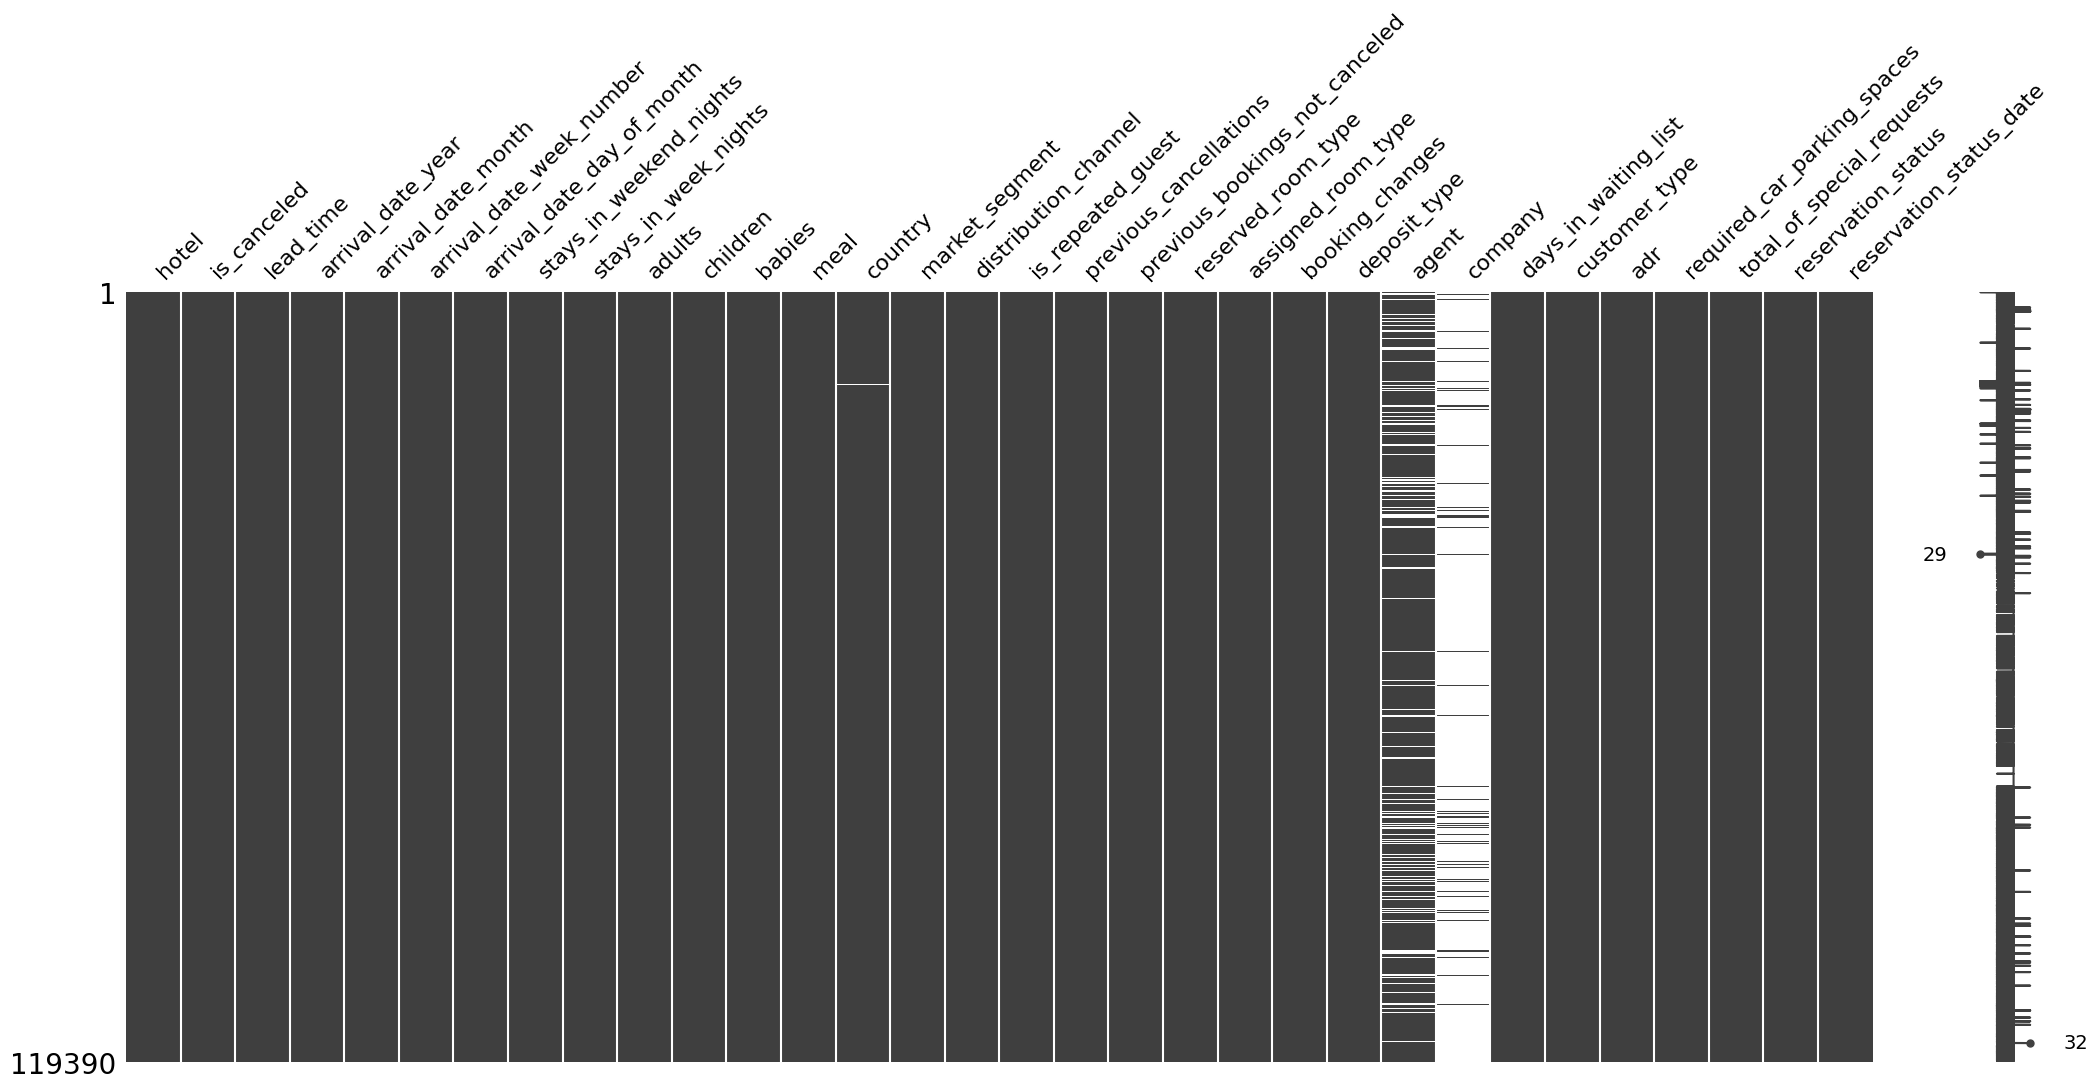

In [8]:
# A white line in this matrix indicates a missing value, whereas a colored line represents non-missing data.
msno.matrix(df)

# **Finding reasons for missing data using a Heatmap**

<Axes: >

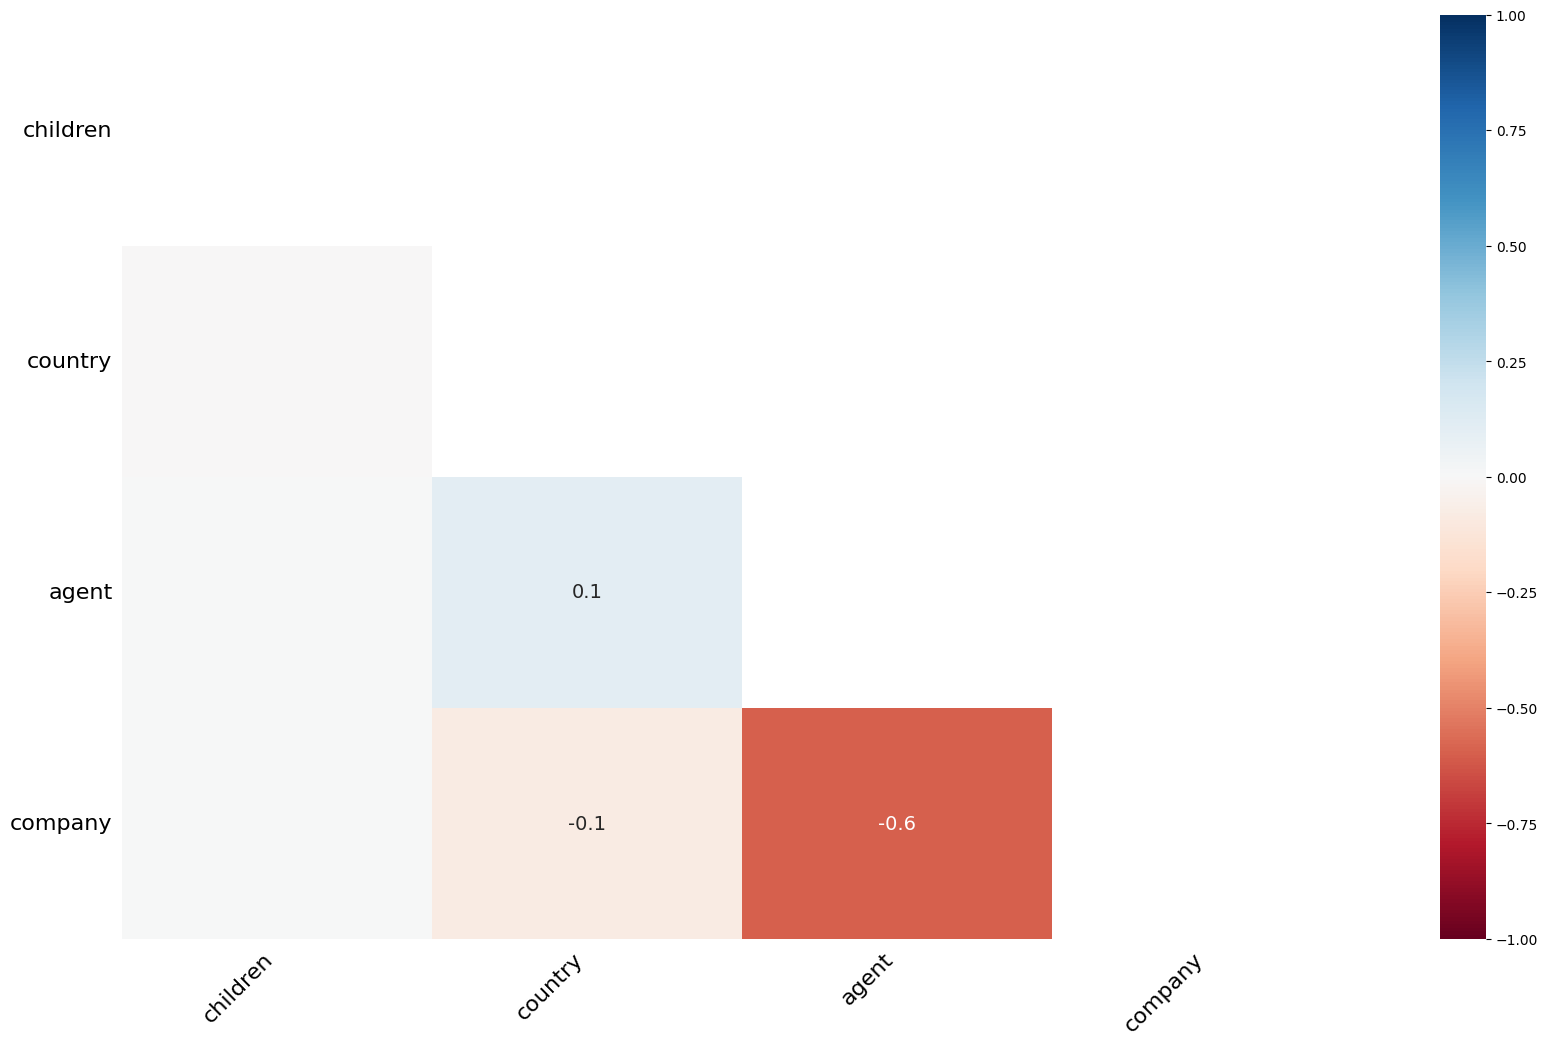

In [9]:
msno.heatmap(df)

**Key patterns learned in this Heatmap:**
>The most significant takeaway is the negative correlation  (-0.6) between "agent" and "company", which may suggest that in this dataset, when data for "agent" is missing, "company" tends to have data, and vice versa.

# **Treating Mising Values**

In [10]:
# Make another copy of the data so as not to mess up the original by accident
df_cp = df.copy()

**Step 1: Handling missing values in "Company" columns**
> Overview: The "Company" column exhibits a high percentage of missing data, with 94.3% of its values absent. While our initial consideration might suggest dropping this column due to the extent of missing data, the heatmap analysis reveals a significant pattern: "Company" frequently contains data when the "Agent" column is missing.

> --> What we will do: Therefore, instead of dropping it, we will retain the "Company" column and impute the missing values with the placeholder "No Company." This approach will allow us to maintain the integrity of the dataset and acknowledge this relationship.

In [11]:
# Converts the "company" column to the object type, allowing to fill in string values
df_cp['company'] = df_cp['company'].astype(object)

# Assign the missing values in the "Company" column with "No company"
df_cp['company'] = df_cp['company'].fillna('No company')

# To see if missing values in "Company" are handled
print(missing_values_table(df_cp))

Your selected dataframe has 32 columns.
There are 3 columns that have missing values.
          Missing Values  % of Total Values
agent              16340               13.7
country              488                0.4
children               4                0.0


**Step 2: Handling missing values in the "agent" column**
>Overview: The "agent" column contains 13.7% missing values. Our initial approach would be to fill these missing values with the placeholder "Unknown agent," similar to what we did with the "company" column.

> --> What we will do: However, given the observed pattern that "company" typically contains data when "agent" is missing, we can leverage this insight for more informed imputation. Inparticular, for rows where the "company" has data and the "agent" is missing, we will fill in the "agent" column with "Company agent." For any remaining missing values in the "agent" column, we will use the placeholder "Unknown agent."

In [12]:
# Ensure the "agent" column is of the correct type (object)
df_cp['agent'] = df_cp['agent'].astype(object)

# Fill "agent" column with "Company agent" where "company" column has data
df_cp.loc[(df_cp['company'].notnull()) & (df_cp['agent'].isnull()), 'agent'] = 'Company agent'

# Fill the remaining missing values in "agent" column with "Unknown agent"
df_cp['agent'] = df_cp['agent'].fillna('Unknown agent')

# Check the results to confirm changes
print(missing_values_table(df_cp))

Your selected dataframe has 32 columns.
There are 2 columns that have missing values.
          Missing Values  % of Total Values
country              488                0.4
children               4                0.0


**Step 3: Handling missing values in the "children" column**
> Overview: There are very few missing entries in the "children" column—only 4 rows are missing throughout the whole dataset.

> --> What we will do: Given that no significant patterns have been identified between the "children" column and other columns with missing values, we will presume that a lack of data suggests there were no children engaged in those bookings. Consequently, we will fill the missing values with "No children."

In [13]:
# Assume that if there’s no data, there were no children involved in those bookings
df_cp['children'] = df_cp['children'].fillna(0)

# Check the results to confirm
print(missing_values_table(df_cp))

Your selected dataframe has 32 columns.
There are 1 columns that have missing values.
         Missing Values  % of Total Values
country             488                0.4


**Step 4: Handling missing values in the "country" column**
> Overview: The "country" column has only 0.4% missing values, which is relatively small. This minor percentage suggests that the absence of data is not expected to have a major impact on the analysis as a whole.  . Furthermore, no patterns exist that connect this column to other ones that have missing values.

> --> What we will do: We will fill the missing values in the "country" column with the most frequently occurring country (the mode) in order to maintain the integrity of the dataset without introducing bias.

In [14]:
# Ensure 'country' column is of the correct type (object)
df_cp['country'] = df_cp['country'].astype(object)

# Fill missing values in 'country' with the mode (most frequent value)
df_cp['country'] = df_cp['country'].fillna(df_cp['country'].mode()[0])

# Check the results to confirm
print(missing_values_table(df_cp))

Your selected dataframe has 32 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


**Download file excel of Clean Data**

In [15]:
output_file1 = 'cleaned_data.xlsx'
output_file2 = 'cleaned_data.csv'
# Xuất ra file xlsx
df_cp.to_excel(output_file1, index=False, engine='openpyxl')
#  Xuất ra file csv
df_cp.to_excel(output_file2, index=False, encoding='utf-8-sig')
print(f"Dữ liệu đã được xuất ra file {output_file1}")
print(f"Dữ liệu đã được xuất ra file {output_file2}")
# from google.colab import files
# files.download('/content/cleaned_data.xlsx')

ValueError: Invalid extension for engine '<property object at 0x0000015C04B5B7C0>': 'csv'

# **I. Descriptive Analytics for Segments**

## **Summary statistics across Market Segment**
> First, we will start by looking up the unique values in the "market_segment" column in our dataset to get a basic understanding of it.

In [ ]:
# Check the unique values in the 'market_segment' column
unique_segments = df['market_segment'].unique()
unique_segments

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
# Define a function to calculate mode since the agg() function does not directly support mode
def calculate_mode(column):
    return column.mode()[0]

# Group data by market_segment
grouped = df_cp.groupby('market_segment')

# Calculate mean, median, std, and mode for adr, lead_time, and is_canceled
segment_summary_stats = grouped.agg({
    'adr': ['mean', 'median', 'std', calculate_mode], # Statistics for ADR
    'lead_time': ['mean', 'median', 'std', calculate_mode], # Statistics for lead_time
    'is_canceled': ['mean', 'median', 'std', calculate_mode] # Statistics for is_canceled
})

# Rename the columns for clarity
segment_summary_stats.columns = segment_summary_stats.columns.set_levels(['mean', 'median', 'std', 'mode'], level=1)

# Display the final result
segment_summary_stats


adr                            lead_time         \
                      mean median        std   mode        mean median   
market_segment                                                           
Aviation        100.142110   95.0  21.796583   95.0    4.443038    3.0   
Complementary     2.886366    0.0  14.036958    0.0   13.286676    3.0   
Corporate        69.358952   65.0  31.775084   65.0   22.125590    7.0   
Direct          115.445175  105.0  59.283482   75.0   49.859115   16.0   
Groups           79.479472   70.0  32.527793   62.0  186.973096  162.0   
Offline TA/TO    87.354783   85.5  47.968695   75.0  135.004459  109.0   
Online TA       117.197063  109.8  48.854802  126.0   82.998725   58.0   
Undefined        15.000000   15.0   4.242641   12.0    1.500000    1.5   

                                is_canceled                        
                       std mode        mean median       std mode  
market_segment                                                     
Aviation          4.607695    0    0.219409    0.0  0.414722    0  
Complementary    31.816140    0    0.130552    0.0  0.337136    0  
Corporate        37.434732    0    0.187347    0.0  0.390226    0  
Direct           70.126099    0    0.153419    0.0  0.360405    0  
Groups          136.828229  277    0.610620    1.0  0.487622    1  
Offline TA/TO   112.003959    0    0.343160    0.0  0.474774    0  
Online TA        79.062304    0    0.367211    0.0  0.482049    0  
Undefined         0.707107    1    1.000000    1.0  0.000000    1

# **Visualization**

**1. Average ADR by Market Segment**

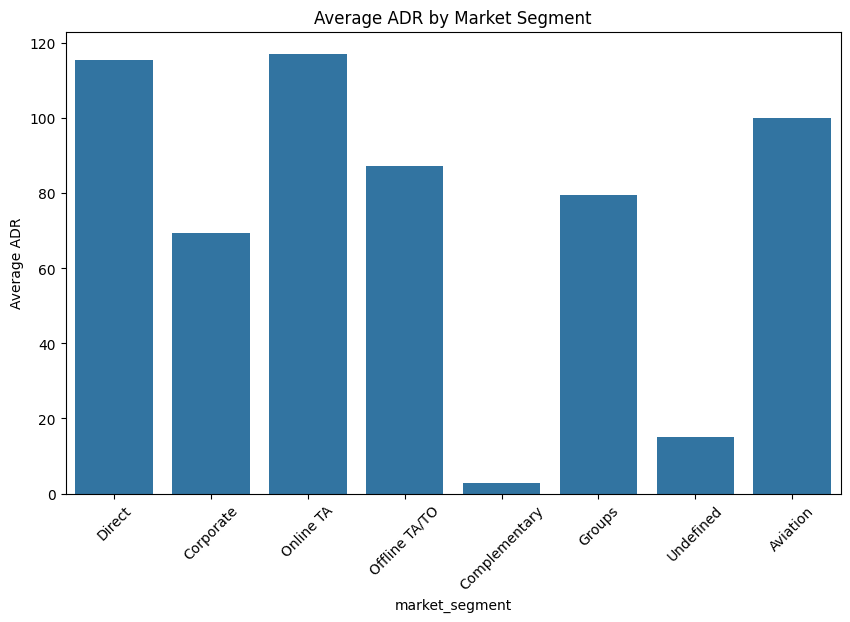

In [ ]:
# Visualize using df (Oridignal Datafram)
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='adr', data=df, estimator=np.mean, errorbar=None)
plt.title('Average ADR by Market Segment')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)
plt.show()

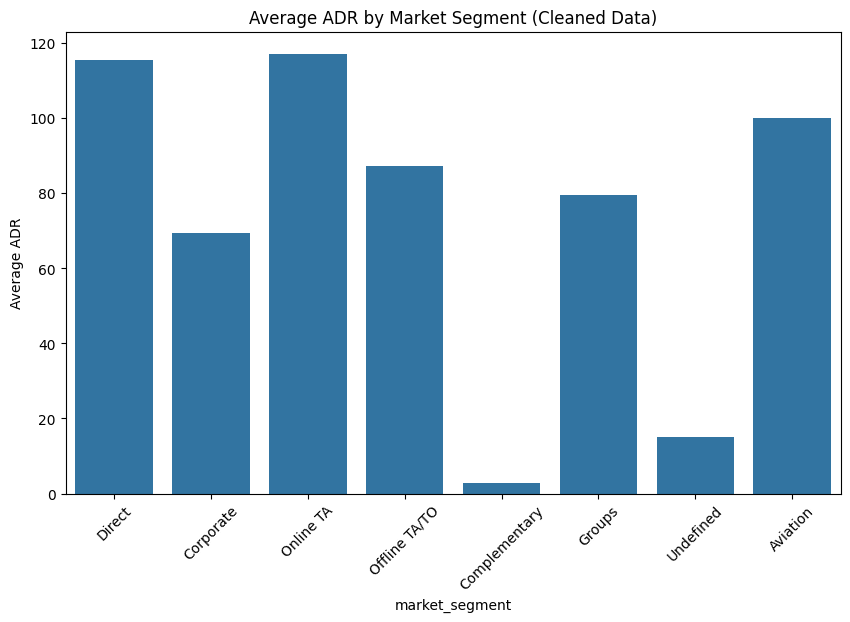

In [ ]:
# Visualize using clean data (df_cp)
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='adr', data=df_cp, estimator=np.mean, errorbar=None)
plt.title('Average ADR by Market Segment (Cleaned Data)')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)
plt.show()

**ADR trends analysis**
> Assign task

**2. Cancellation Rate by Market Segment**

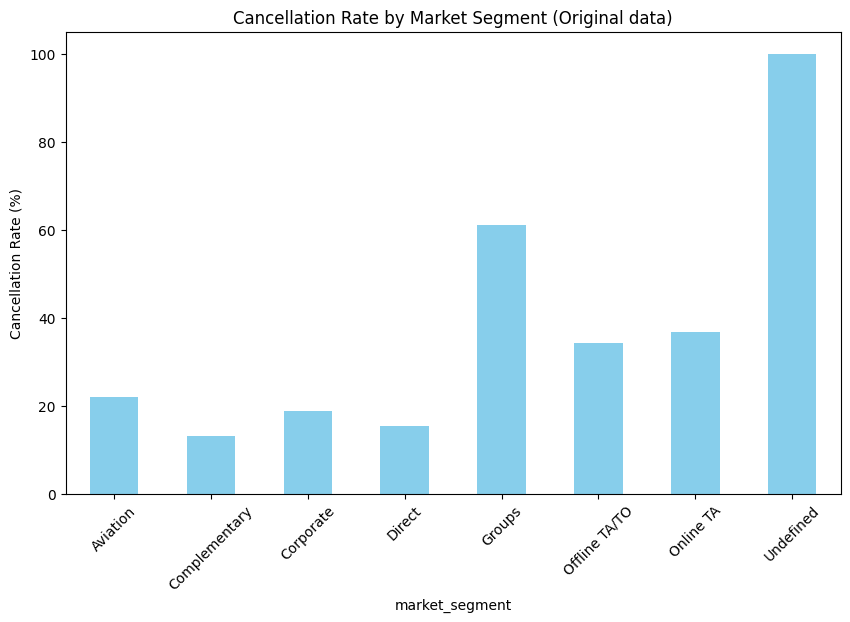

In [ ]:
plt.figure(figsize=(10, 6))
cancellation_rate = df.groupby('market_segment')['is_canceled'].mean() * 100
cancellation_rate.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Market Segment (Original data)')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()

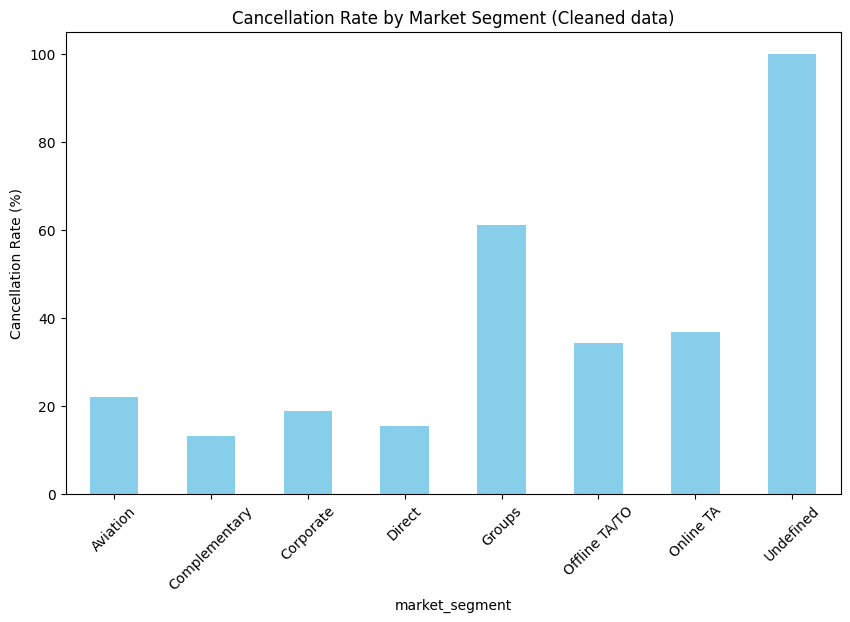

In [ ]:
plt.figure(figsize=(10, 6))
cancellation_rate = df_cp.groupby('market_segment')['is_canceled'].mean() * 100
cancellation_rate.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Market Segment (Cleaned data)')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.show()

**3. Lead time by Market Segment**

In [ ]:
lead_time_summary = df['lead_time'].describe()

# Print the summary statistics
print(lead_time_summary)

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64


In [ ]:
# Extract lead time statistics
lead_time_summary = segment_summary_stats['lead_time'].reset_index()

# Rename columns for clarity
lead_time_summary.columns = ['market_segment', 'mean', 'median', 'std', 'mode']

***a) Mean lead time***

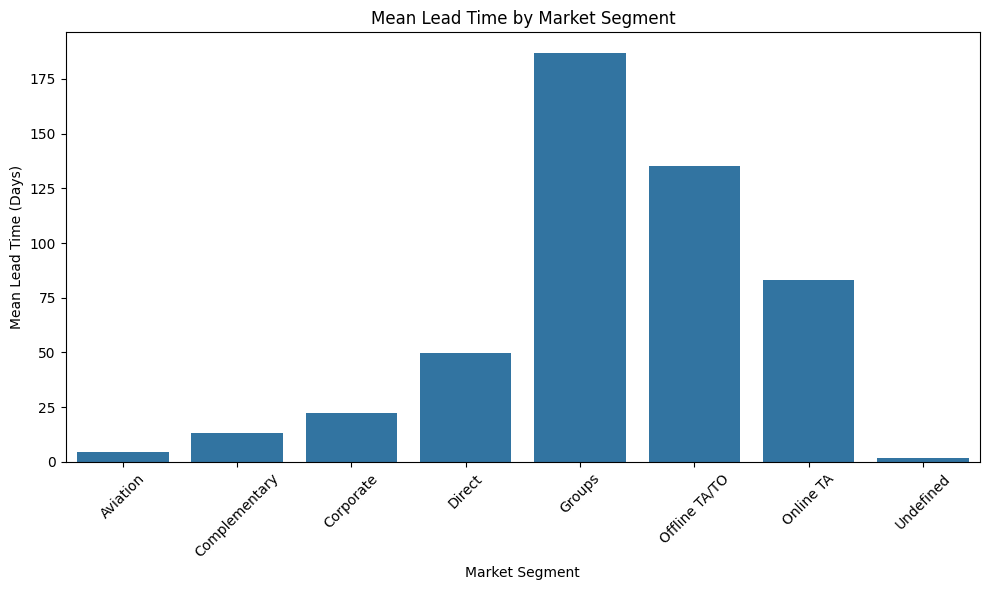

In [ ]:
# Create a bar plot for mean lead time
plt.figure(figsize=(10, 6))
sns.barplot(data=lead_time_summary, x='market_segment', y='mean')
plt.title('Mean Lead Time by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Mean Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

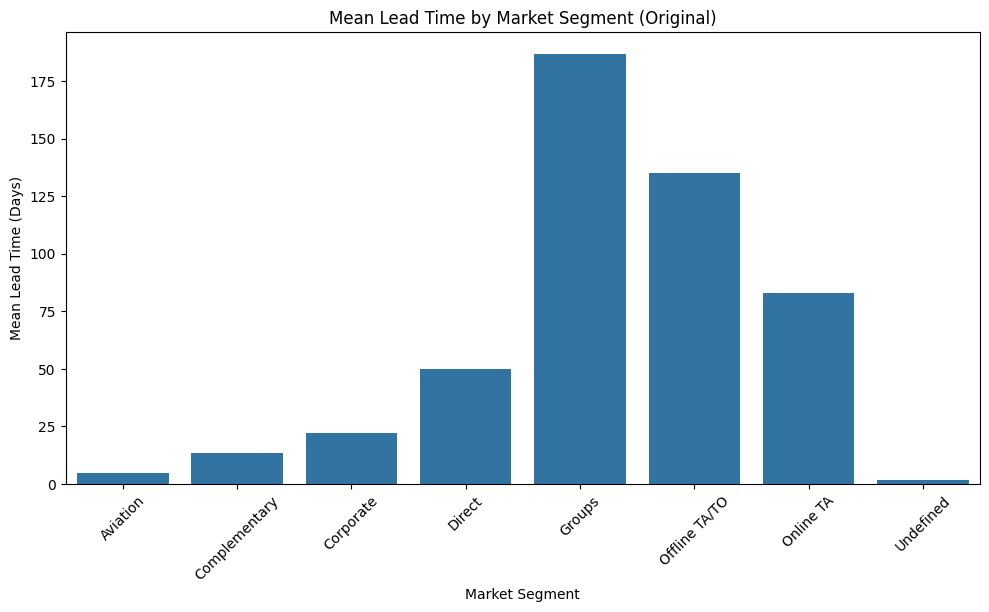

In [ ]:
plt.figure(figsize=(10, 6))
lead_time_df = df.groupby('market_segment')['lead_time'].mean().reset_index()
sns.barplot(data=lead_time_df, x='market_segment', y='lead_time')
plt.xlabel('Market Segment')
plt.ylabel('Mean Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Mean Lead Time by Market Segment (Original)')
plt.show()


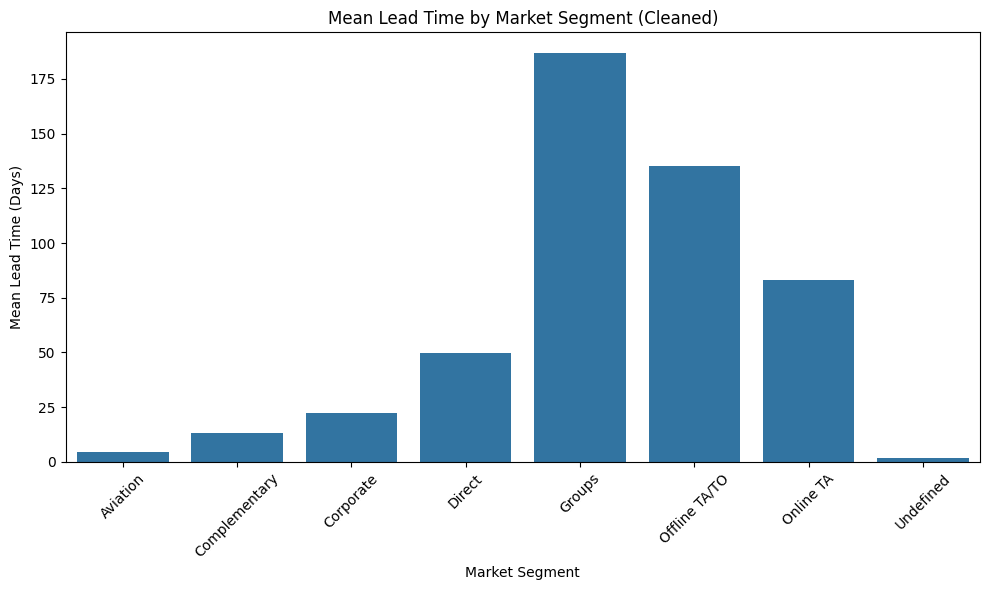

In [ ]:
plt.figure(figsize=(10, 6))
lead_time_df = df_cp.groupby('market_segment')['lead_time'].mean().reset_index()
sns.barplot(data=lead_time_df, x='market_segment', y='lead_time')
plt.title('Mean Lead Time by Market Segment (Cleaned)')
plt.xlabel('Market Segment')
plt.ylabel('Mean Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Mean Lead Time Analysis:**
>

## **Summary statistics across Distribution Channel**
> First, we will start by looking up the unique values in the "distribution_channel" column in our dataset to get a basic understanding of it.

In [ ]:
unique_segments = df['distribution_channel'].unique()
unique_segments

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
# Define a function to calculate mode since the agg() function does not directly support mode
def calculate_mode(column):
    return column.mode()[0]

# Group data by distribution_channel
grouped = df_cp.groupby('distribution_channel')

# Calculate mean, median, std, and mode for adr, lead_time, and is_canceled
segment_summary_stats = grouped.agg({
    'adr': ['mean', 'median', 'std', calculate_mode], # Statistics for ADR
    'lead_time': ['mean', 'median', 'std', calculate_mode], # Statistics for lead_time
    'is_canceled': ['mean', 'median', 'std', calculate_mode] # Statistics for is_canceled
})

# Rename the columns for clarity
segment_summary_stats.columns = segment_summary_stats.columns.set_levels(['mean', 'median', 'std', 'mode'], level=1)

# Display the final result
segment_summary_stats

adr                           lead_time         \
                            mean median        std  mode        mean median   
distribution_channel                                                          
Corporate              69.325204   65.0  33.441796  65.0   44.910289    9.0   
Direct                106.654983   96.0  61.865601   0.0   57.829362   19.0   
GDS                   120.554301  115.0  42.671935  96.0   20.715026   10.0   
TA/TO                 103.292866   95.5  48.828702  62.0  115.122438   83.0   
Undefined              46.240000   18.0  46.029480  12.0   23.000000    2.0   

                                      is_canceled                        
                             std mode        mean median       std mode  
distribution_channel                                                     
Corporate              83.104233    0    0.220758    0.0  0.414789    0  
Direct                 79.030476    0    0.174599    0.0  0.379637    0  
GDS                    28.204547    0    0.191710    0.0  0.394670    0  
TA/TO                 108.759059    0    0.410259    0.0  0.491883    0  
Undefined              44.816292    1    0.800000    1.0  0.447214    1

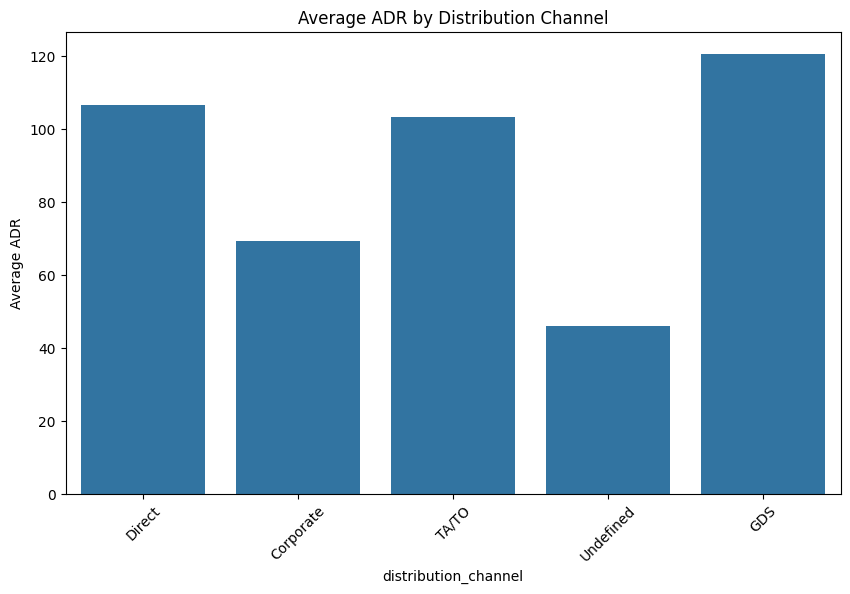

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='distribution_channel', y='adr', data=df, estimator=np.mean, errorbar=None)
plt.title('Average ADR by Distribution Channel')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)
plt.show()

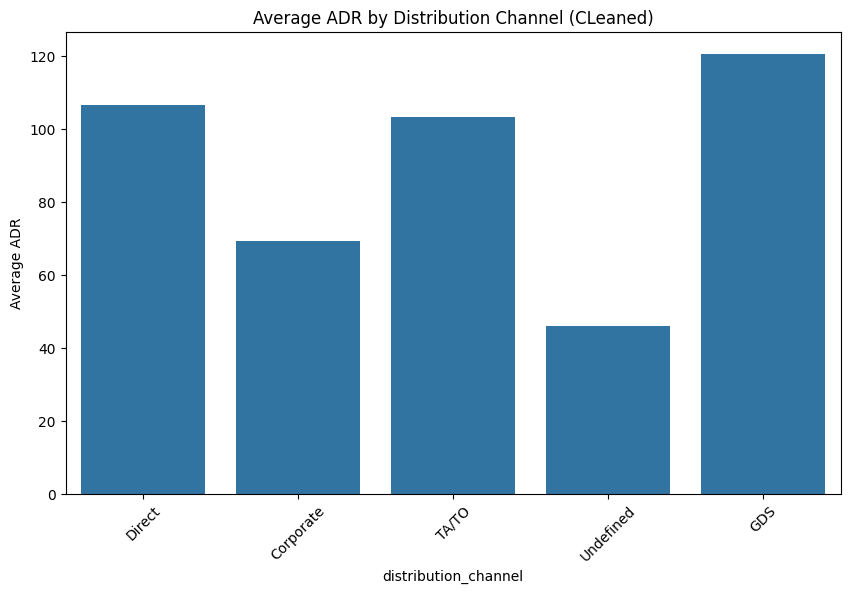

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='distribution_channel', y='adr', data=df_cp, estimator=np.mean, errorbar=None)
plt.title('Average ADR by Distribution Channel (CLeaned)')
plt.ylabel('Average ADR')
plt.xticks(rotation=45)
plt.show()

# **II. Segment-Based Linear Regression Models**